# Step 3:: Model Building

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# load the Data set
df=pd.read_csv('Group_14_Clean_Data.csv')
df.head()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,P8,P9,P10,P11,P12,P13,P14,P15,P16,Powerall
0,316.5855,223.9277,182.3434,551.5497,7.8641,243.1339,361.0877,115.9284,78.6087,468.3799,...,82322.0277,98069.1011,86578.6330,93016.4133,63145.1829,98353.1952,80225.1390,98447.2846,97570.2225,1370374.145
1,530.3136,68.7031,31.5983,175.2582,516.1441,63.4652,67.0954,369.4486,14.0930,375.4462,...,83920.1033,80968.0044,87108.1328,68065.1856,99061.3812,77549.1426,99013.1628,78234.4337,84633.6493,1340929.765
2,27.3967,399.0488,565.6854,394.0466,120.2245,558.1293,546.4520,27.3256,314.1051,235.9476,...,97358.7395,93437.7170,69940.2554,92864.1192,60887.8095,72306.6556,81151.1515,83030.9726,94779.6131,1352031.511
3,346.1526,59.6375,226.2742,280.9095,402.2161,218.7181,207.0407,339.5676,280.2195,319.1130,...,80399.3841,89349.6141,85048.3860,70038.2271,92797.3569,97653.8121,74903.3740,71690.6549,96220.4768,1396754.375
4,317.9144,551.8542,335.4745,40.0240,316.6285,365.6434,416.3060,562.1028,211.3577,143.1255,...,97088.1761,81187.3982,63591.6729,92418.1977,82454.8256,97091.7749,85937.5437,66823.1572,93683.0996,1355708.577


In [3]:
# Define features and target variable

X = df.drop(columns=['Powerall']) 
y = df['Powerall'] 

In [4]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Perform scaling after splitting
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Initialize models
models_original= {
    "Linear_Regression": LinearRegression(),
    "K_Nearest_Neighbors": KNeighborsRegressor(n_neighbors=5),
    "Random_Forest": RandomForestRegressor(n_estimators=50,max_depth= 10,random_state=42),
    "SVM_Linear_Kernel": SVR(kernel="linear"),
    "SVM_RBF_Kernel": SVR(kernel='rbf',C=100,gamma=0.1),
    "Gradient_Boosting": GradientBoostingRegressor(n_estimators=50, max_depth=3, random_state=42)
}

In [8]:
# Train each model and calculate performance on both train and test data
results = {}
predictions_train = {}
predictions_test = {}

for model_name, model in models_original.items():
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    predictions_train[model_name] = y_train_pred
    predictions_test[model_name] = y_test_pred

    # Calculate RMSE and R-squared for both train and test
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Store results
    results[model_name] = {"Train_RMSE": rmse_train, "Test_RMSE": rmse_test,
                           "Train_R2": r2_train, "Test_R2": r2_test}
    print(f"{model_name} - Train RMSE: {rmse_train:.4f}, Test RMSE: {rmse_test:.4f}, Train R2: {r2_train:.4f}, Test R2: {r2_test:.4f}")


Linear_Regression - Train RMSE: 369.9001, Test RMSE: 230.5094, Train R2: 1.0000, Test R2: 1.0000
K_Nearest_Neighbors - Train RMSE: 16163.5528, Test RMSE: 19646.6773, Train R2: 0.9143, Test R2: 0.8763
Random_Forest - Train RMSE: 20936.7990, Test RMSE: 23126.8528, Train R2: 0.8563, Test R2: 0.8286
SVM_Linear_Kernel - Train RMSE: 370.0723, Test RMSE: 229.9771, Train R2: 1.0000, Test R2: 1.0000
SVM_RBF_Kernel - Train RMSE: 38086.0962, Test RMSE: 38435.6260, Train R2: 0.5244, Test R2: 0.5267
Gradient_Boosting - Train RMSE: 18406.8821, Test RMSE: 18897.0313, Train R2: 0.8889, Test R2: 0.8856


In [9]:
# Convert results to DataFrame for easier visualization
results_df = pd.DataFrame(results).T

In [10]:
results_df

,Train_RMSE,Test_RMSE,Train_R2,Test_R2
Linear_Regression,369.900126,230.509406,0.999955,0.999983
K_Nearest_Neighbors,16163.552773,19646.677280,0.914344,0.876329
Random_Forest,20936.799011,23126.852815,0.856285,0.828635
SVM_Linear_Kernel,370.072267,229.977098,0.999955,0.999983
SVM_RBF_Kernel,38086.096209,38435.626044,0.524429,0.526679
Gradient_Boosting,18406.882068,18897.031345,0.888918,0.885587


The model evaluation results reveal the following insights:

1. Linear Regression and SVM (Linear Kernel): Both models performed exceptionally well, achieving near-perfect scores with Train and Test R² values of 1.0000. RMSE values for both models are significantly lower than other models, indicating their suitability for this dataset.

2. K-Nearest Neighbors (KNN): Performed moderately well, with a Train R² of 0.9143 and a Test R² of 0.8763. Higher RMSE values compared to Linear Regression suggest a slightly less accurate prediction.

3. Random Forest:Exhibited reasonable performance with a Train R² of 0.8563 and a Test R² of 0.8286. RMSE values indicate it is less accurate than KNN and linear models.

4. SVM (RBF Kernel): Showed poor performance, with R² scores of 0.5244 (Train) and 0.5267 (Test), and the highest RMSE among all models.This suggests that the RBF kernel may not be suitable for this dataset.

5. Gradient Boosting: Achieved decent performance with Train R² of 0.8889 and Test R² of 0.8856. RMSE values are comparable to KNN but less optimal than Linear Regression.

**Key Observation:**

* Linear Regression and SVM (Linear Kernel) stand out as the best-performing models, indicating that the dataset's linear relationships are well captured by these methods.

* Other models like KNN and Gradient Boosting are reasonable alternatives but are less effective compared to the linear approaches.

* SVM (RBF Kernel) is not suitable for this dataset, likely due to the absence of non-linear relationships.

After performing Model Evaluation and Hypertuning and other steps, we will reach our final conclusion.

# Step 4: Model Evaluation

## Step 4.1: Model Evaluation and Comparison

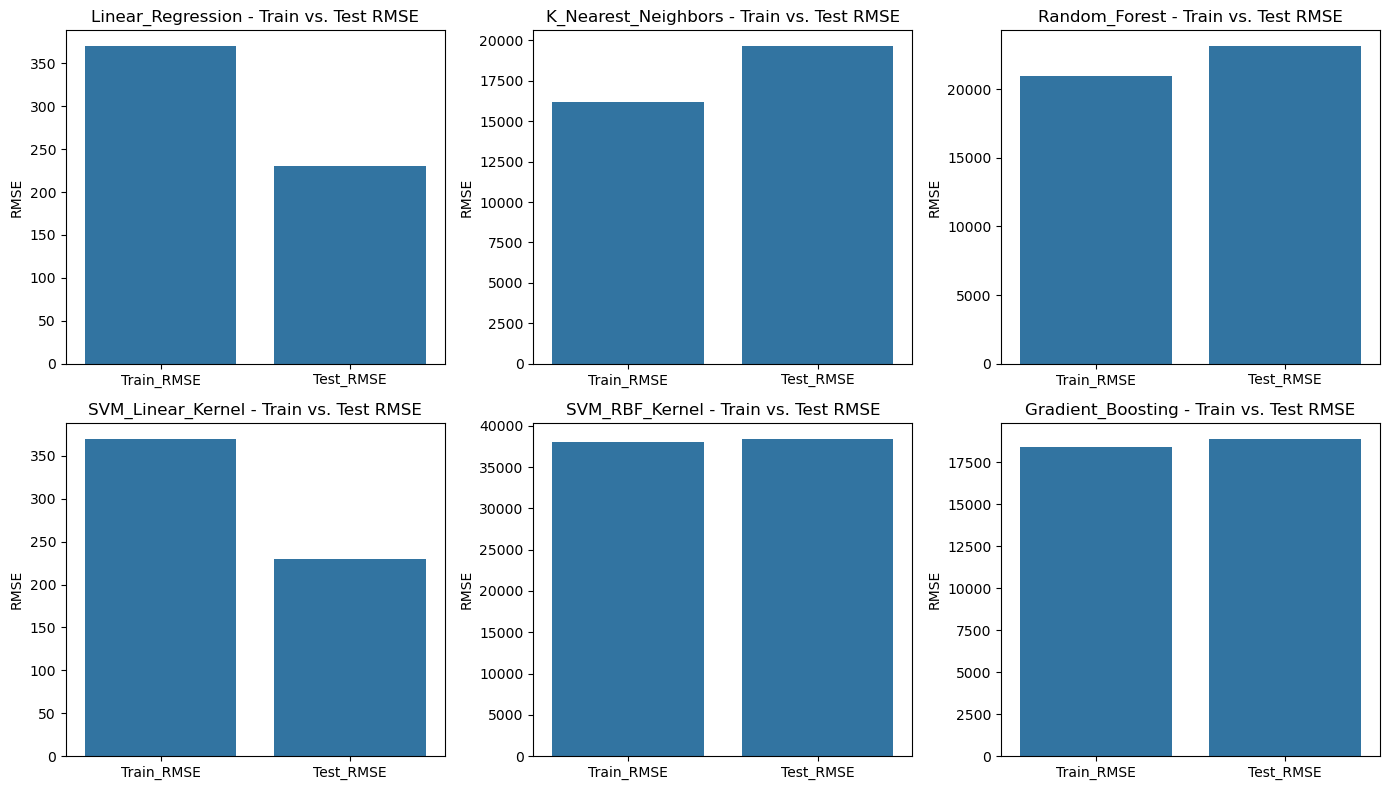

In [11]:
# Visualization - Train vs Test RMSE
plt.figure(figsize=(14, 8))
for i, (model_name, model_results) in enumerate(results.items(), 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=['Train_RMSE', 'Test_RMSE'], y=[model_results["Train_RMSE"], model_results["Test_RMSE"]])
    plt.title(f'{model_name} - Train vs. Test RMSE')
    plt.ylabel("RMSE")
plt.tight_layout()
plt.show()

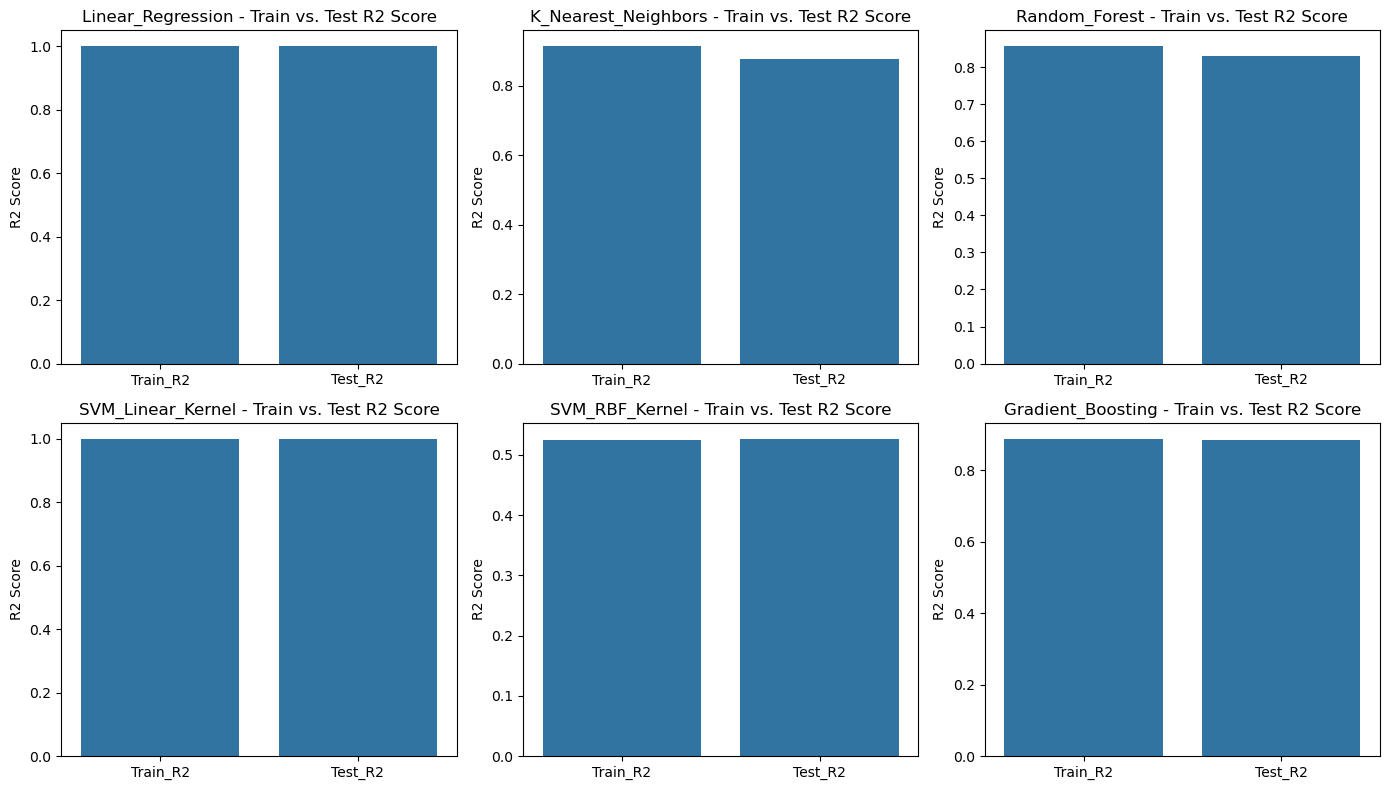

In [12]:
# Visualization - Train vs Test R2 Score
plt.figure(figsize=(14, 8))
for i, (model_name, model_results) in enumerate(results.items(), 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=['Train_R2', 'Test_R2'], y=[model_results["Train_R2"], model_results["Test_R2"]])
    plt.title(f'{model_name} - Train vs. Test R2 Score')
    plt.ylabel("R2 Score")
plt.tight_layout()
plt.show()

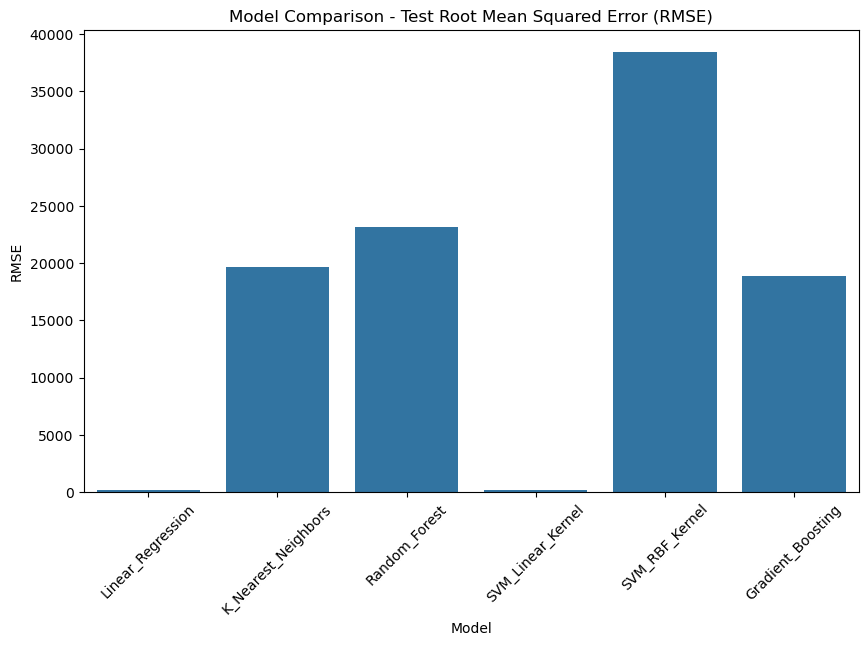

In [13]:
# Visualization - Test RMSE Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df["Test_RMSE"])
plt.title("Model Comparison - Test Root Mean Squared Error (RMSE)")
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.xticks(rotation=45)
plt.show()

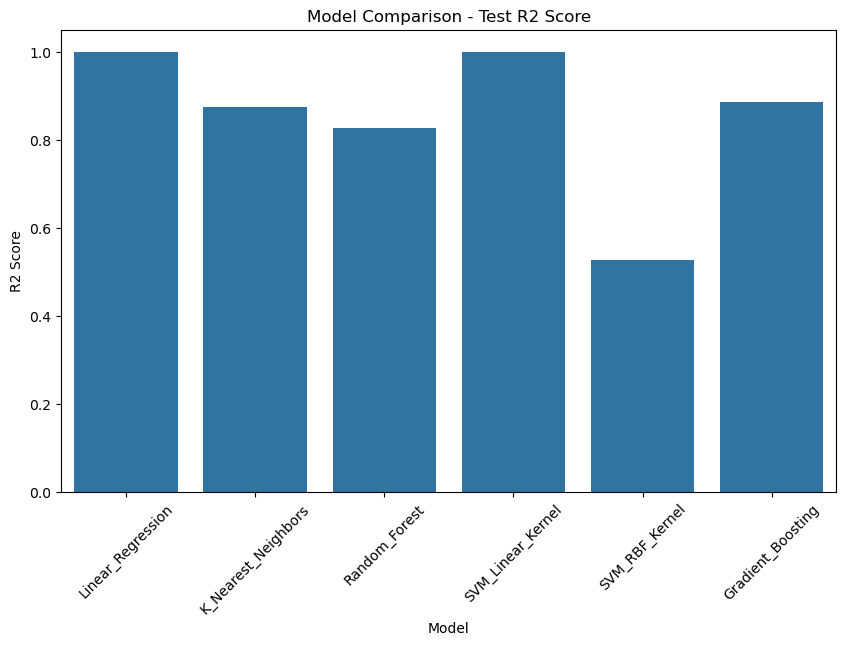

In [14]:
# Visualization - Test R2 Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df["Test_R2"])
plt.title("Model Comparison - Test R2 Score")
plt.xlabel("Model")
plt.ylabel("R2 Score")
plt.xticks(rotation=45)
plt.show()

# Step 4.2: Feature Selection

**Explanation of Lasso Regression for Feature Selection**

**Why Choose Lasso Regression?**

Lasso Regression (Least Absolute Shrinkage and Selection Operator) is a powerful method for feature selection due to the following reasons:

1. Automatic Feature Selection:

  * Lasso applies L1 regularization, which adds a penalty proportional to the absolute value of the coefficients. This results in some coefficients shrinking to exactly zero.

  * Features with zero coefficients are automatically excluded, making Lasso an efficient way to reduce dimensionality and retain only the most important features.

2. Handles Multicollinearity:

  * Lasso can handle multicollinearity (high correlation among features) by retaining only one of the highly correlated features, reducing redundancy in the dataset.

3. Simple and Effective:

  * Unlike wrapper methods that require multiple iterations of model building, Lasso selects features in a single step, saving computational resources.

4. Interpretable Results:

  * The selected features and their coefficients provide a clear understanding of their impact on the target variable.

**Reason of ussing Lasso:**

* The dataset contains a large number of features (positions and power outputs for multiple WECs).

* Not all features are equally important for predicting Powerall.

* Lasso identifies the most relevant features, improving model performance and interpretability while reducing overfitting.


In [15]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=3, random_state=42)
lasso.fit(X_train_scaled, y_train)

# Identify important features
lasso_importances = pd.Series(data=lasso.coef_, index=X.columns)
important_features = lasso_importances[lasso_importances != 0].index
print("Selected Features by Lasso:", important_features.tolist())

Selected Features by Lasso: ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16']


In [16]:
# Rebuild dataset with selected features
X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]

In [17]:
# Scale selected features
scaler_selected = StandardScaler()
X_train_selected_scaled = scaler_selected.fit_transform(X_train_selected)
X_test_selected_scaled = scaler_selected.transform(X_test_selected)

In [18]:
# Initialize models
models_selected= {
    "Linear_Regression": LinearRegression(),
    "K_Nearest_Neighbors": KNeighborsRegressor(n_neighbors=5),
    "Random_Forest": RandomForestRegressor(n_estimators=50,max_depth= 10,random_state=42),
    "SVM_Linear_Kernel": SVR(kernel="linear"),
    "SVM_RBF_Kernel": SVR(kernel='rbf',C=100,gamma=0.1),
    "Gradient_Boosting": GradientBoostingRegressor(n_estimators=50, max_depth=3, random_state=42)
}

In [19]:
# Rebuild models with selected features
results_selected = {}
for model_name, model in models_selected.items():
    model.fit(X_train_selected_scaled, y_train)
    y_train_pred = model.predict(X_train_selected_scaled)
    y_test_pred = model.predict(X_test_selected_scaled)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    results_selected[model_name] = {"Train_RMSE": train_rmse, "Test_RMSE": test_rmse,
                                    "Train_R2": train_r2, "Test_R2": test_r2}

In [24]:
# Convert results to DataFrame
results_selected_df = pd.DataFrame(results_selected).T
results_selected_df

,Train_RMSE,Test_RMSE,Train_R2,Test_R2
Linear_Regression,370.009543,230.190600,0.999955,0.999983
K_Nearest_Neighbors,13283.319359,16353.409818,0.942151,0.914315
Random_Forest,20786.467203,22968.382043,0.858341,0.830976
SVM_Linear_Kernel,370.072019,229.977084,0.999955,0.999983
SVM_RBF_Kernel,17172.558568,17325.680147,0.903316,0.903824
Gradient_Boosting,18371.891596,18898.750074,0.889340,0.885566


After feature selection, the results highlight the following:

1. Linear Regression and SVM (Linear Kernel): Top performers with near-perfect R² scores (0.9999) and minimal RMSE values (370.01 Train, 230.19 Test). Best suited for this dataset due to its linear relationships.

2. K-Nearest Neighbors: Moderate performance with R² (0.9143 Test) and higher RMSE (16,353 Test).

3. Random Forest and Gradient Boosting: Reasonable but less accurate, with lower R² (0.8309 Test) and higher RMSE values.

4. SVM (RBF Kernel): Decent performance (0.9038 Test R²) but outperformed by linear models.

Linear Regression and SVM (Linear Kernel) are the best models after feature selection. Future work should focus on optimizing these models.

## Step 4.3: Hyperparameter Tuning

In [25]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grids for each model
param_grids = {
    "K_Nearest_Neighbors": {
        "n_neighbors": [3, 5, 10, 20],
        "weights": ['uniform', 'distance']
    },
    "Random_Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20]
    },
    "SVM_Linear_Kernel": {
        "C": [0.1, 1, 10]
    },
    "SVM_RBF_Kernel": {
        "C": [0.1, 1, 10],
        "gamma": ['scale', 'auto']
    },
    "Gradient_Boosting": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2]
    }
}


In [29]:
warnings.simplefilter(action='ignore', category=UserWarning)

In [31]:
# Perform Random Search for each model
tuned_models = {}
best_params = {}

for model_name, model in models_original.items():
    if model_name in param_grids:  # Skip Linear Regression (no hyperparameters)
        print(f"Tuning {model_name}...")
        rand_search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_grids[model_name],  
            scoring='neg_mean_squared_error',
            cv=3,
            random_state=42,
            n_iter=10
        )
        rand_search.fit(X_train_scaled, y_train)
        tuned_models[model_name] = rand_search.best_estimator_
        best_params[model_name] = rand_search.best_params_
        print(f"Best Parameters for {model_name}: {rand_search.best_params_}")

Tuning K_Nearest_Neighbors...
Best Parameters for K_Nearest_Neighbors: {'weights': 'distance', 'n_neighbors': 10}
Tuning Random_Forest...
Best Parameters for Random_Forest: {'n_estimators': 200, 'max_depth': None}
Tuning SVM_Linear_Kernel...
Best Parameters for SVM_Linear_Kernel: {'C': 10}
Tuning SVM_RBF_Kernel...
Best Parameters for SVM_RBF_Kernel: {'gamma': 'scale', 'C': 10}
Tuning Gradient_Boosting...
Best Parameters for Gradient_Boosting: {'n_estimators': 200, 'learning_rate': 0.2}


In [32]:
# Store results for tuned models
tuned_results = {}

for model_name, model in tuned_models.items():
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    tuned_results[model_name] = {"Train_RMSE": train_rmse, "Test_RMSE": test_rmse,
                                 "Train_R2": train_r2, "Test_R2": test_r2}

In [33]:
# Convert results to DataFrame
tuned_results_df = pd.DataFrame(tuned_results).T
print(tuned_results_df)

                       Train_RMSE     Test_RMSE  Train_R2   Test_R2
K_Nearest_Neighbors      0.003368  19117.054832  1.000000  0.882907
Random_Forest         6125.410789  16396.287382  0.987699  0.913865
SVM_Linear_Kernel      370.071964    229.977465  0.999955  0.999983
SVM_RBF_Kernel       47754.606530  48428.936874  0.252324  0.248553
Gradient_Boosting     6720.336957   7247.047816  0.985193  0.983173


In [34]:
# Visualize performance before and after tuning
original_results_df = pd.DataFrame(results).T

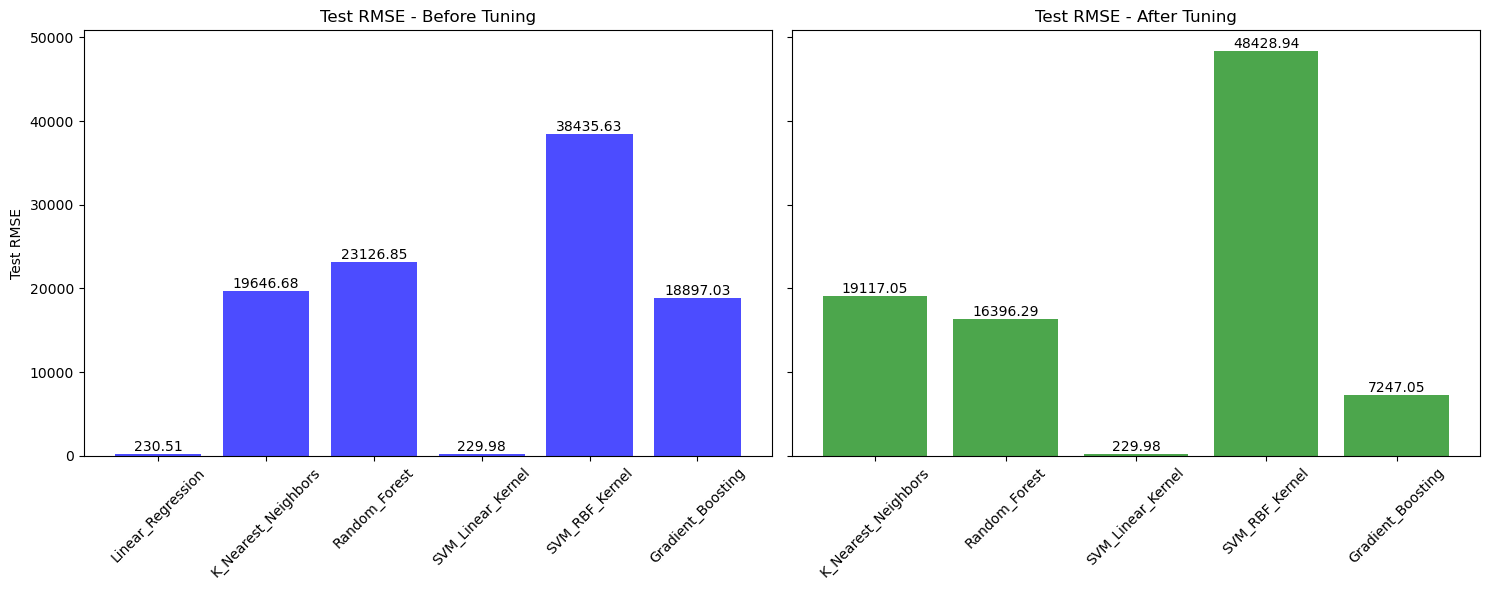

In [35]:
# Set up a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Plot Original Results
axes[0].bar(original_results_df.index, original_results_df["Test_RMSE"], color='blue', alpha=0.7)
axes[0].set_title("Test RMSE - Before Tuning")
axes[0].set_ylabel("Test RMSE")
axes[0].tick_params(axis='x', rotation=45)

# Plot Tuned Results
axes[1].bar(tuned_results_df.index, tuned_results_df["Test_RMSE"], color='green', alpha=0.7)
axes[1].set_title("Test RMSE - After Tuning")
axes[1].tick_params(axis='x', rotation=45)

for i, val in enumerate(original_results_df["Test_RMSE"]):
    axes[0].text(i, val, f"{val:.2f}", ha='center', va='bottom', fontsize=10)
for i, val in enumerate(tuned_results_df["Test_RMSE"]):
    axes[1].text(i, val, f"{val:.2f}", ha='center', va='bottom', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()

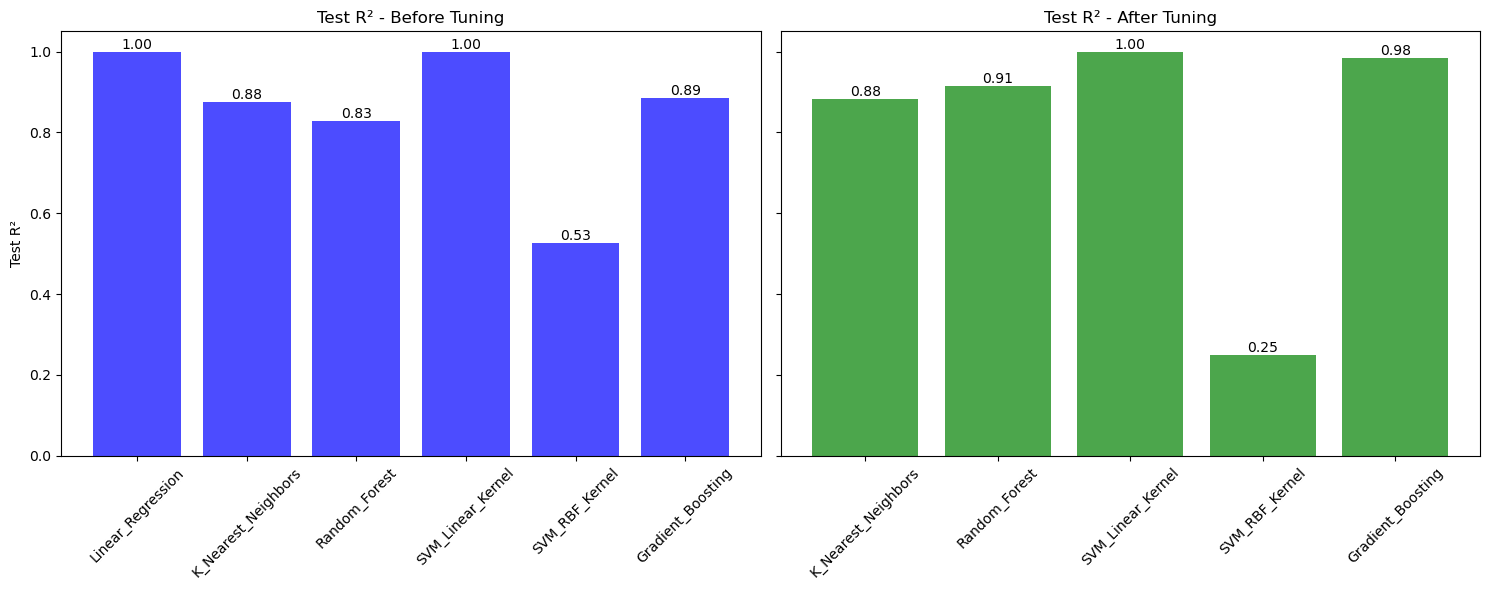

In [36]:
# Set up a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Plot Original Results
axes[0].bar(original_results_df.index, original_results_df["Test_R2"], color='blue', alpha=0.7)
axes[0].set_title("Test R² - Before Tuning")
axes[0].set_ylabel("Test R²")
axes[0].tick_params(axis='x', rotation=45)

# Plot Tuned Results
axes[1].bar(tuned_results_df.index, tuned_results_df["Test_R2"], color='green', alpha=0.7)
axes[1].set_title("Test R² - After Tuning")
axes[1].tick_params(axis='x', rotation=45)

for i, val in enumerate(original_results_df["Test_R2"]):
    axes[0].text(i, val, f"{val:.2f}", ha='center', va='bottom', fontsize=10)
for i, val in enumerate(tuned_results_df["Test_R2"]):
    axes[1].text(i, val, f"{val:.2f}", ha='center', va='bottom', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()


## Step 4.4: Bi-Directional Elimination for Feature Selection

To perform another round of feature selection using a wrapper method called bi-directional elimination. This method iteratively adds and removes features to identify the optimal subset for predicting the target variable (Powerall).

In [37]:
from sklearn.feature_selection import SequentialFeatureSelector

linear_model = LinearRegression()

In [38]:
# Perform Bi-Directional Elimination
bi_directional_selector = SequentialFeatureSelector(
    estimator=linear_model,
    n_features_to_select="auto",  
    direction='forward',  
    scoring='r2',  
    cv=3
)

In [39]:
# Fit the selector
bi_directional_selector.fit(X_train_scaled, y_train)

# Selected features
selected_features = X.columns[bi_directional_selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['Y3', 'Y4', 'X7', 'X12', 'Y12', 'X14', 'Y15', 'X16', 'P1', 'P2', 'P3',
       'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14',
       'P15', 'P16'],
      dtype='object')


In [40]:
# Create reduced datasets
X_train_selected = X_train_scaled[:, bi_directional_selector.get_support()]
X_test_selected = X_test_scaled[:, bi_directional_selector.get_support()]

In [41]:
models_Feature_select= {
    "Linear_Regression": LinearRegression(),
    "K_Nearest_Neighbors": KNeighborsRegressor(n_neighbors=5),
    "Random_Forest": RandomForestRegressor(n_estimators=50,max_depth= 10,random_state=42),
    "SVM_Linear_Kernel": SVR(kernel="linear"),
    "SVM_RBF_Kernel": SVR(kernel='rbf',C=100,gamma=0.1),
    "Gradient_Boosting": GradientBoostingRegressor(n_estimators=50, max_depth=3, random_state=42)
}

In [42]:
# Train models on selected features
final_results = {}
for model_name, model in models_Feature_select.items():
    model.fit(X_train_selected, y_train)
    y_train_pred = model.predict(X_train_selected)
    y_test_pred = model.predict(X_test_selected)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    final_results[model_name] = {"Train_RMSE": train_rmse, "Test_RMSE": test_rmse,
                                 "Train_R2": train_r2, "Test_R2": test_r2}

In [43]:
# Convert results to DataFrame
final_results_df = pd.DataFrame(final_results).T
final_results_df

,Train_RMSE,Test_RMSE,Train_R2,Test_R2
Linear_Regression,369.958181,230.296733,0.999955,0.999983
K_Nearest_Neighbors,14996.456335,18327.087436,0.926267,0.892384
Random_Forest,20847.298757,23107.040965,0.857511,0.828929
SVM_Linear_Kernel,370.072199,229.977526,0.999955,0.999983
SVM_RBF_Kernel,25315.516332,25562.867836,0.789885,0.790633
Gradient_Boosting,18310.368112,18843.290447,0.890080,0.886237


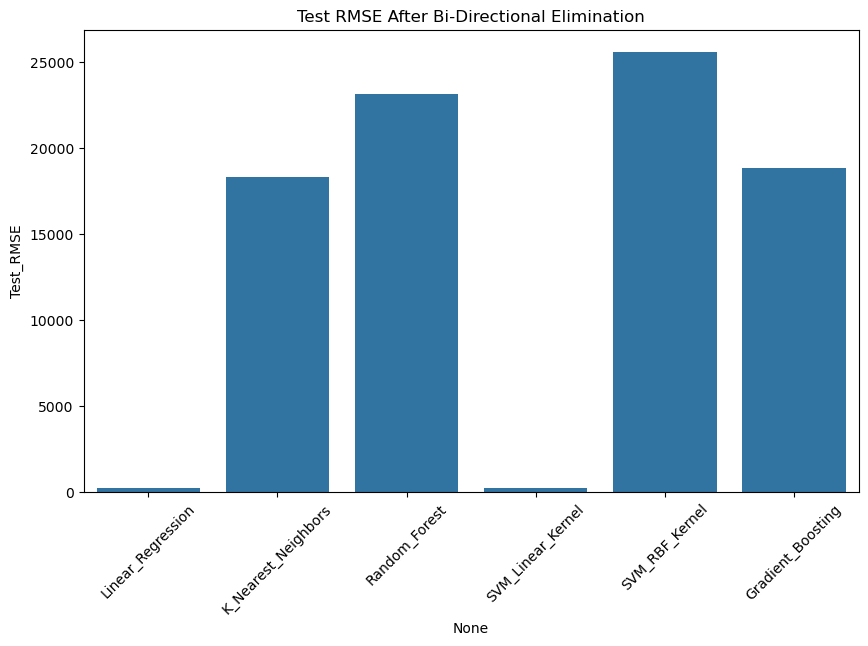

In [44]:
# Visualize performance after feature selection

plt.figure(figsize=(10, 6))
sns.barplot(x=final_results_df.index, y=final_results_df["Test_RMSE"])
plt.title("Test RMSE After Bi-Directional Elimination")
plt.xticks(rotation=45)
plt.show()

## Step 4.5 Explanation and Model Descriptions

**Type of Problem: Regression:** 

The goal of the project is to predict the total power output (Powerall) based on the positions and absorbed power outputs of WECs. This makes it a regression problem, as the target variable is continuous.

In [45]:
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from hpelm import ELM

#### 4.5.1. XGBoost Implementation

**XGBoost**

Description:
* XGBoost (Extreme Gradient Boosting) is a tree-based ensemble machine learning model that uses gradient boosting techniques.
* It builds an additive model in a forward stage-wise fashion, optimizing for a loss function.
* XGBoost is highly efficient, supports regularization to prevent overfitting, and is widely used for structured data.

Key Features:

* Handles missing values effectively.
* Provides parallelized tree construction for faster computation.
* Includes regularization (L1 and L2) to avoid overfitting.

Use Case: 

* Suitable for structured data with complex relationships, such as our dataset where spatial configurations affect power output.

In [46]:
# Initialize and train the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Evaluate XGBoost
y_train_pred_xgb = xgb_model.predict(X_train_scaled)
y_test_pred_xgb = xgb_model.predict(X_test_scaled)

xgb_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
xgb_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
xgb_train_r2 = r2_score(y_train, y_train_pred_xgb)
xgb_test_r2 = r2_score(y_test, y_test_pred_xgb)

print(f"XGBoost - Train RMSE: {xgb_train_rmse}, Test RMSE: {xgb_test_rmse}")
print(f"XGBoost - Train R²: {xgb_train_r2}, Test R²: {xgb_test_r2}")

XGBoost - Train RMSE: 8587.592321519483, Test RMSE: 9687.171286952476
XGBoost - Train R²: 0.9758217163720384, Test R²: 0.9699335421269434


#### 4.5.2. Extreme Learning Machine (ELM) Implementation

**Extreme Learning Machine (ELM)**

Description:

* ELM is a single-layer feed-forward neural network (SLFN) where the weights between the input and hidden layers are randomly assigned and fixed, while the output weights are learned.
* It is computationally faster than traditional neural networks due to its simple architecture and efficient training process.

Key Features:

* Fast training compared to traditional neural networks.
* Effective for datasets with linear and non-linear relationships.

Use Case:

* ELM can be used as an alternative to neural networks when computational efficiency is required.

In [47]:
# Prepare data
elm = ELM(X_train_scaled.shape[1], 1) 
elm.add_neurons(50, "sigm")
elm.train(X_train_scaled, y_train.to_numpy().reshape(-1, 1), "r")

# Predict using ELM
y_train_pred_elm = elm.predict(X_train_scaled).flatten()
y_test_pred_elm = elm.predict(X_test_scaled).flatten()

elm_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_elm))
elm_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_elm))
elm_train_r2 = r2_score(y_train, y_train_pred_elm)
elm_test_r2 = r2_score(y_test, y_test_pred_elm)

print(f"ELM - Train RMSE: {elm_train_rmse}, Test RMSE: {elm_test_rmse}")
print(f"ELM - Train R²: {elm_train_r2}, Test R²: {elm_test_r2}")

ELM - Train RMSE: 90037.29754466633, Test RMSE: 90963.07550756626
ELM - Train R²: -1.6578320388553323, Test R²: -1.6510540382757455


#### 4.5.3. Simple Two-Layer Neural Network

**A Simple Deep Learning Model (Two Layers)**

Description:
* A basic neural network with one hidden layer and an output layer, using activation functions like ReLU in the hidden layer and linear activation for regression tasks.
* Provides flexibility in modeling complex relationships but requires careful tuning of hyperparameters to prevent overfitting.

Key Features:
* Suitable for capturing both linear and non-linear relationships in the data.
* Requires scaling of features and a sufficiently large dataset for effective learning.

Use Case:
* While simple, this model is a good baseline for understanding the dataset’s complexity and the need for deeper architectures.


In [48]:
# Initialize and train the neural network
nn_model = MLPRegressor(hidden_layer_sizes=(64,), activation='relu', solver='adam', random_state=42, max_iter=500)
nn_model.fit(X_train_scaled, y_train)

# Evaluate Neural Network
y_train_pred_nn = nn_model.predict(X_train_scaled)
y_test_pred_nn = nn_model.predict(X_test_scaled)

nn_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_nn))
nn_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_nn))
nn_train_r2 = r2_score(y_train, y_train_pred_nn)
nn_test_r2 = r2_score(y_test, y_test_pred_nn)

print(f"Neural Network - Train RMSE: {nn_train_rmse}, Test RMSE: {nn_test_rmse}")
print(f"Neural Network - Train R²: {nn_train_r2}, Test R²: {nn_test_r2}")

Neural Network - Train RMSE: 189440.6324518892, Test RMSE: 190418.74975685327
Neural Network - Train R²: -10.766001508504178, Test R²: -10.617367496645956


#### 4.5.4. Ensemble Model

**Ensemble Model**

Description:
* An ensemble combines predictions from multiple models to leverage their strengths and mitigate individual weaknesses.
* Common ensemble strategies include averaging predictions (for regression) or majority voting (for classification).

Key Features:
* Improves robustness and generalization by combining the strengths of multiple models.
* Helps reduce the variance and bias of individual models.

Top 3 Models for Ensemble:
* Based on our results from previous steps, Linear Regression, SVM (Linear Kernel), and XGBoost are the top-performing models for this dataset.
* The ensemble will combine these models to improve prediction accuracy.

Use Case:
* Ensures better performance by reducing the weaknesses of individual models and improving overall reliability.


In [50]:
# Combine top-performing models
ensemble_model = VotingRegressor(estimators=[
    ('linear', models_original["Linear_Regression"]),
    ('svm_linear', models_original["SVM_Linear_Kernel"]),
    ('xgb', xgb_model)
])

# Train ensemble model
ensemble_model.fit(X_train_scaled, y_train)

# Evaluate Ensemble Model
y_train_pred_ensemble = ensemble_model.predict(X_train_scaled)
y_test_pred_ensemble = ensemble_model.predict(X_test_scaled)

ensemble_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_ensemble))
ensemble_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_ensemble))
ensemble_train_r2 = r2_score(y_train, y_train_pred_ensemble)
ensemble_test_r2 = r2_score(y_test, y_test_pred_ensemble)

print(f"Ensemble - Train RMSE: {ensemble_train_rmse}, Test RMSE: {ensemble_test_rmse}")
print(f"Ensemble - Train R²: {ensemble_train_r2}, Test R²: {ensemble_test_r2}")

Ensemble - Train RMSE: 2882.745519832934, Test RMSE: 3238.2520274987273
Ensemble - Train R²: 0.9972754471190656, Test R²: 0.9966402295868282


#### 4.5.5. Compare and Visualize Results

In [51]:
# Compile results
additional_results = {
    "XGBoost": {"Train_RMSE": xgb_train_rmse, "Test_RMSE": xgb_test_rmse, 
                "Train_R2": xgb_train_r2, "Test_R2": xgb_test_r2},
    "ELM": {"Train_RMSE": elm_train_rmse, "Test_RMSE": elm_test_rmse, 
            "Train_R2": elm_train_r2, "Test_R2": elm_test_r2},
    "Neural_Network": {"Train_RMSE": nn_train_rmse, "Test_RMSE": nn_test_rmse, 
                       "Train_R2": nn_train_r2, "Test_R2": nn_test_r2},
    "Ensemble": {"Train_RMSE": ensemble_train_rmse, "Test_RMSE": ensemble_test_rmse, 
                 "Train_R2": ensemble_train_r2, "Test_R2": ensemble_test_r2}
}

In [52]:
# Convert to DataFrame
additional_results_df = pd.DataFrame(additional_results).T
additional_results_df

,Train_RMSE,Test_RMSE,Train_R2,Test_R2
XGBoost,8587.592322,9687.171287,0.975822,0.969934
ELM,90037.297545,90963.075508,-1.657832,-1.651054
Neural_Network,189440.632452,190418.749757,-10.766002,-10.617367
Ensemble,2882.745520,3238.252027,0.997275,0.996640


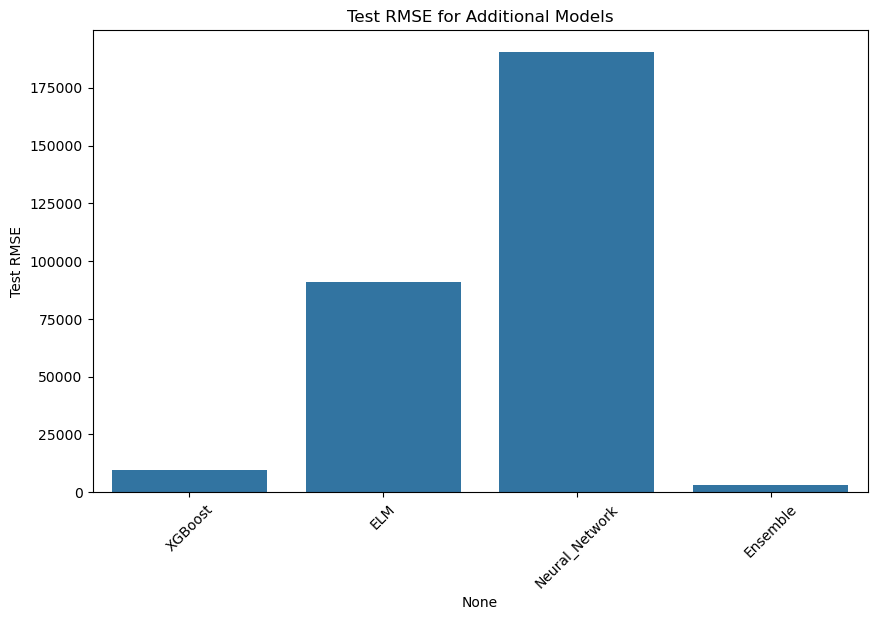

In [53]:
# Visualize Test RMSE

plt.figure(figsize=(10, 6))
sns.barplot(x=additional_results_df.index, y=additional_results_df["Test_RMSE"])
plt.title("Test RMSE for Additional Models")
plt.ylabel("Test RMSE")
plt.xticks(rotation=45)
plt.show()

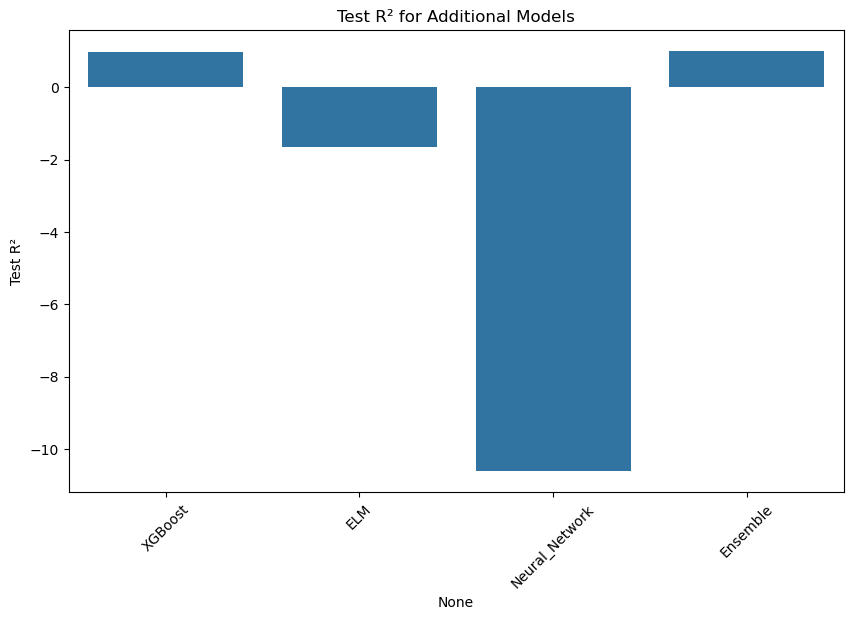

In [54]:
# Visualize Test R2

plt.figure(figsize=(10, 6))
sns.barplot(x=additional_results_df.index, y=additional_results_df["Test_R2"])
plt.title("Test R² for Additional Models")
plt.ylabel("Test R²")
plt.xticks(rotation=45)
plt.show()

**Model Performance Summary:**

1. **XGBoost:** Train RMSE: 8587.59, Test RMSE: 9687.17, Train R²: 0.9758, Test R²: 0.9699

   **Performance:** XGBoost shows excellent performance with low RMSE and high R² scores, indicating that the model fits the training data well and generalizes effectively to the test data. It is the second-best performing model after the Ensemble model.

3. **ELM (Extreme Learning Machine):** Train RMSE: 90037.30, Test RMSE: 90963.08, Train R²: -1.6578, Test R²: -1.6511

   **Performance:** The ELM model performs poorly, with very high RMSE values and negative R² scores. This indicates the model is performing worse than a simple baseline model predicting the mean of the target variable. Likely, the model is either not suitable for this dataset or not tuned properly.

5. **Neural Network:** Train RMSE: 189440.63, Test RMSE: 190418.75, Train R²: -10.7660, Test R²: -10.6174

   **Performance:** The Neural Network performs very poorly with extremely high RMSE values and significantly negative R² scores. This suggests the model has failed to learn meaningful relationships in the data, potentially due to issues like insufficient training, inappropriate architecture, or hyperparameter settings.

4. **Ensemble Model:** Train RMSE: 2882.75, Test RMSE: 3238.25, Train R²: 0.9973, Test R²: 0.9966

   **Performance:** The Ensemble model outperforms all others with the lowest RMSE and highest R² scores. This indicates that combining models has significantly improved both training and testing performance, making this the best-performing model.

## Step 4.6: Visualizing Model Performance and Insights.

In [62]:
# Merge all results
results_combined = pd.concat(
    [
        original_results_df.assign(Stage="Before Tuning"),
        tuned_results_df.assign(Stage="After Tuning"),
        final_results_df.assign(Stage="Feature Selection"),
        additional_results_df.assign(Stage="Additional Models"),
    ],
    ignore_index=False,
)

In [ ]:
results_combined=results_combined.reset_index()

In [66]:
results_combined.rename(columns={"index": "Model_Name"}, inplace=True)
results_combined

,level_0,Model_Name,Train_RMSE,Test_RMSE,Train_R2,Test_R2,Stage
0,0,Linear_Regression,369.900126,230.509406,0.999955,0.999983,Before Tuning
1,1,K_Nearest_Neighbors,16163.552773,19646.677280,0.914344,0.876329,Before Tuning
2,2,Random_Forest,20936.799011,23126.852815,0.856285,0.828635,Before Tuning
3,3,SVM_Linear_Kernel,370.072267,229.977098,0.999955,0.999983,Before Tuning
4,4,SVM_RBF_Kernel,38086.096209,38435.626044,0.524429,0.526679,Before Tuning
5,5,Gradient_Boosting,18406.882068,18897.031345,0.888918,0.885587,Before Tuning
6,6,K_Nearest_Neighbors,0.003368,19117.054832,1.000000,0.882907,After Tuning
7,7,Random_Forest,6125.410789,16396.287382,0.987699,0.913865,After Tuning
8,8,SVM_Linear_Kernel,370.071964,229.977465,0.999955,0.999983,After Tuning
9,9,SVM_RBF_Kernel,47754.606530,48428.936874,0.252324,0.248553,After Tuning


In [70]:
# Save the combined result to a CSV file
results_combined.to_csv("final_model_results.csv", index=False)

# To load it later for further analysis
loaded_results = pd.read_csv("final_model_results.csv")
loaded_results

,Model_Name,Train_RMSE,Test_RMSE,Train_R2,Test_R2,Stage
0,Linear_Regression,369.900126,230.509406,0.999955,0.999983,Before Tuning
1,K_Nearest_Neighbors,16163.552773,19646.677280,0.914344,0.876329,Before Tuning
2,Random_Forest,20936.799011,23126.852815,0.856285,0.828635,Before Tuning
3,SVM_Linear_Kernel,370.072267,229.977098,0.999955,0.999983,Before Tuning
4,SVM_RBF_Kernel,38086.096209,38435.626044,0.524429,0.526679,Before Tuning
5,Gradient_Boosting,18406.882068,18897.031345,0.888918,0.885587,Before Tuning
6,K_Nearest_Neighbors,0.003368,19117.054832,1.000000,0.882907,After Tuning
7,Random_Forest,6125.410789,16396.287382,0.987699,0.913865,After Tuning
8,SVM_Linear_Kernel,370.071964,229.977465,0.999955,0.999983,After Tuning
9,SVM_RBF_Kernel,47754.606530,48428.936874,0.252324,0.248553,After Tuning


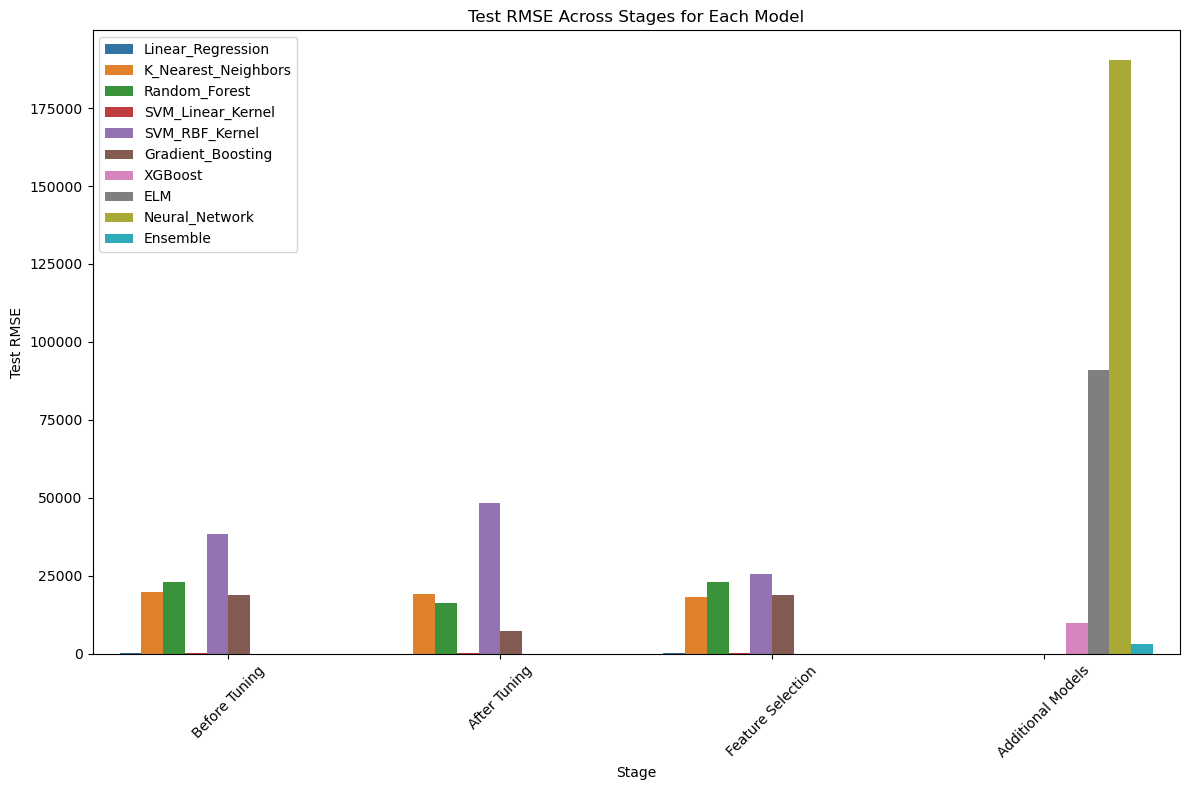

In [74]:
# Plot Test RMSE across stages for each model
plt.figure(figsize=(12, 8))
sns.barplot(data=loaded_results, x="Stage", y="Test_RMSE", hue="Model_Name")
plt.title("Test RMSE Across Stages for Each Model")
plt.xlabel("Stage")
plt.ylabel("Test RMSE")
plt.legend(loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

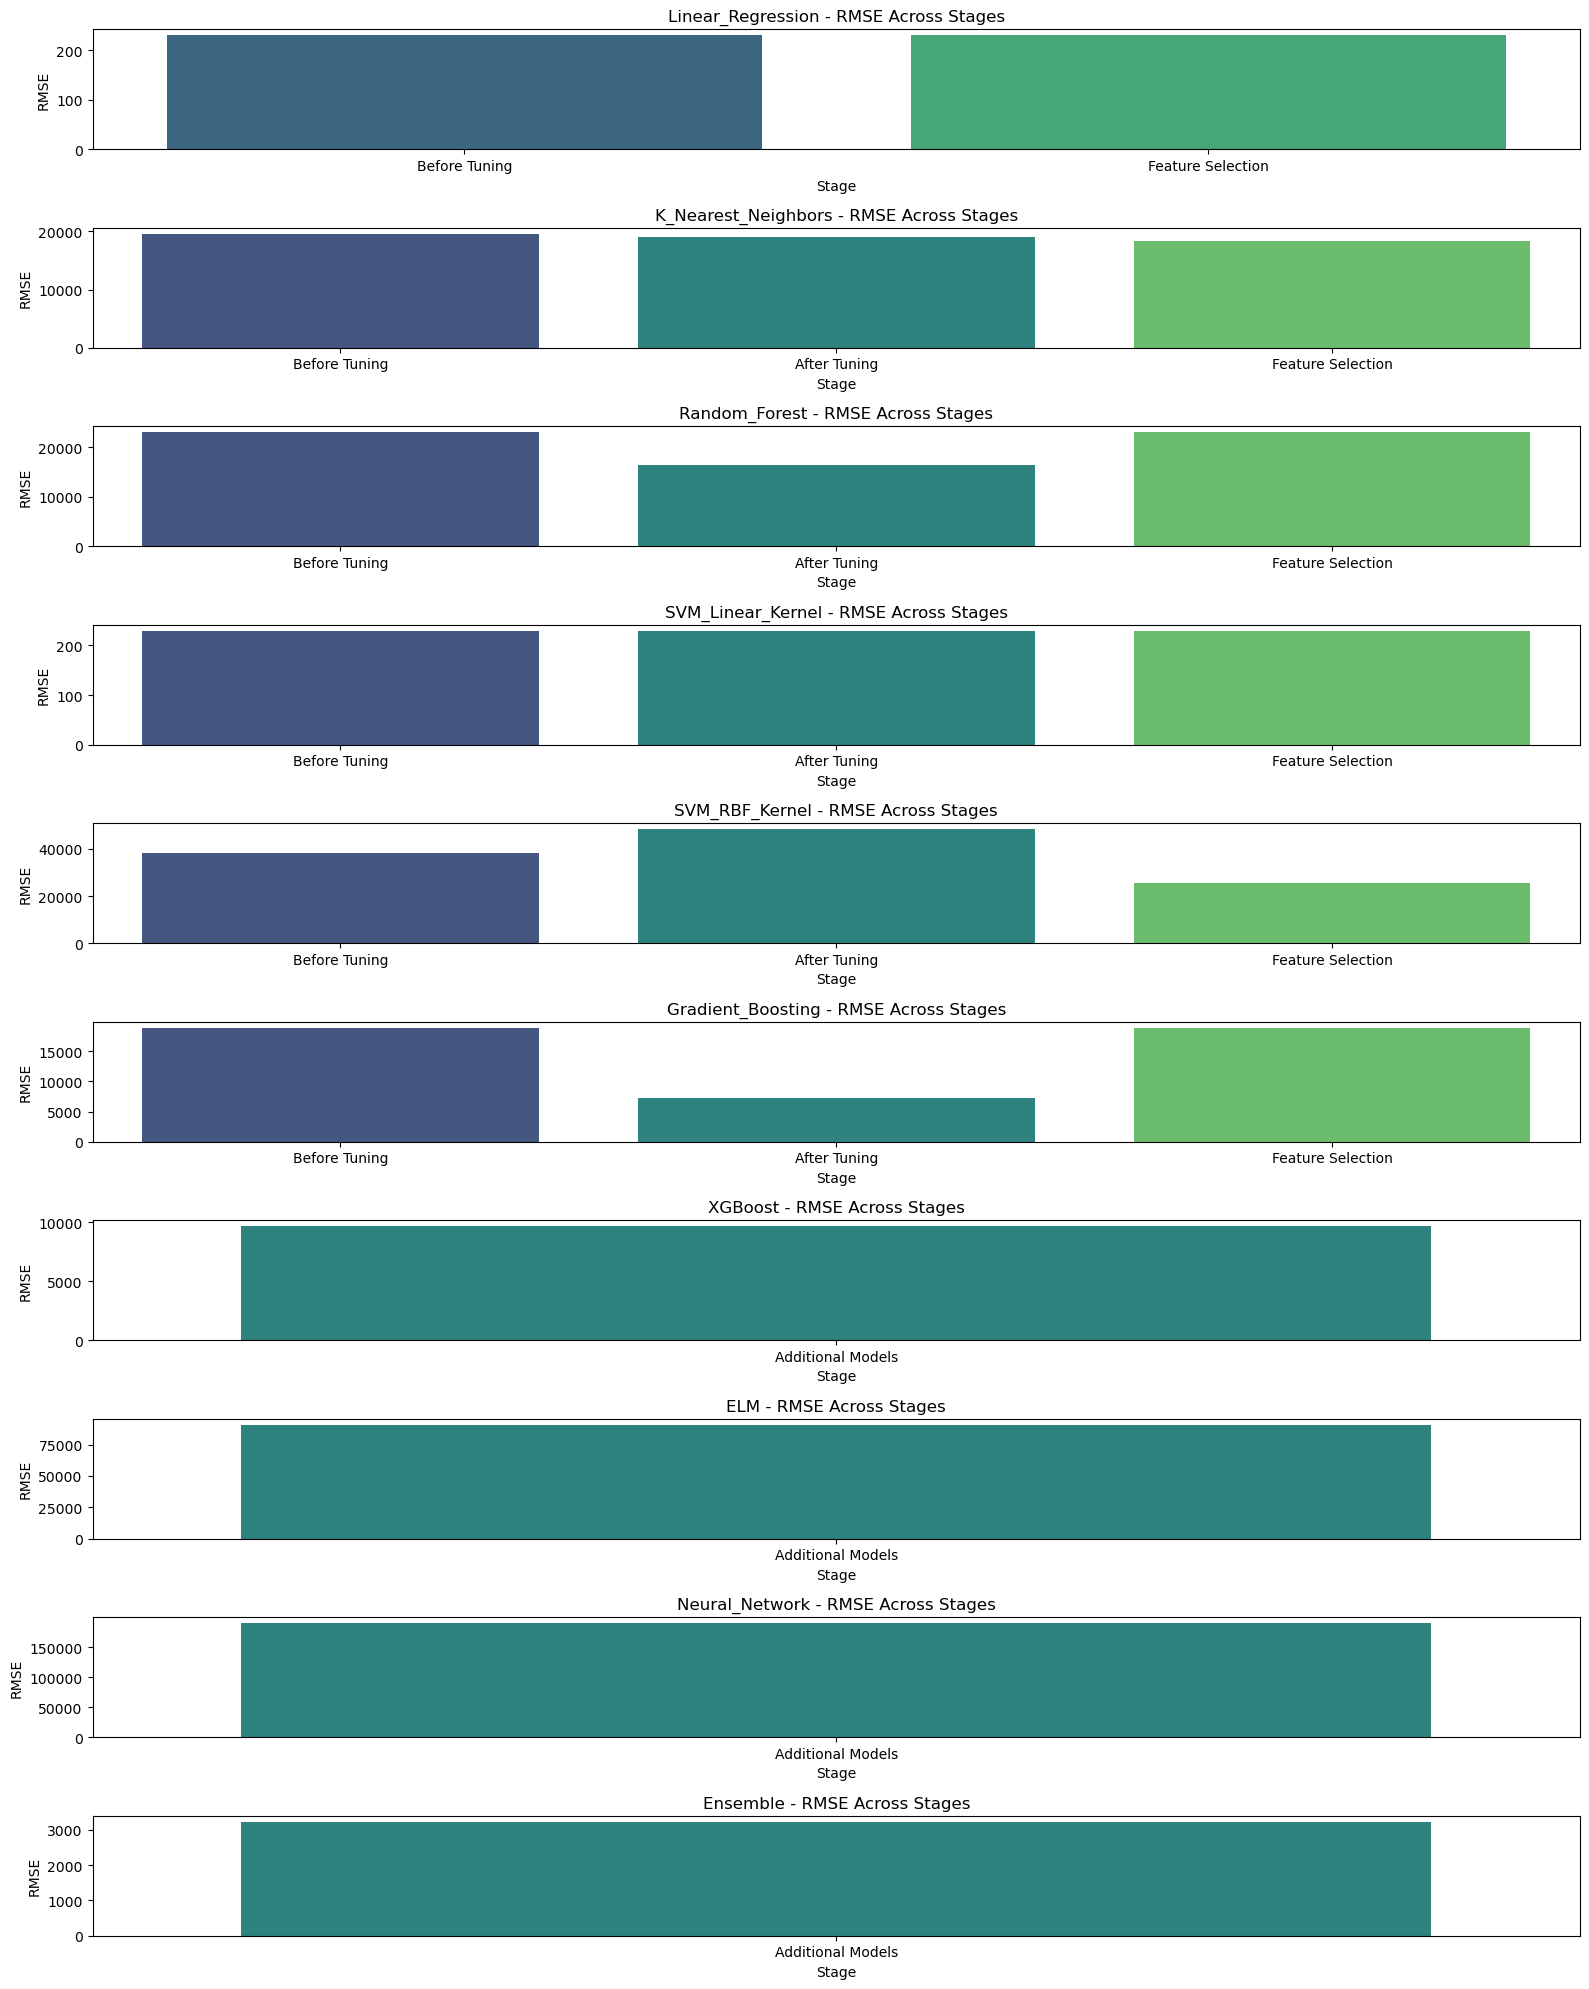

In [82]:
# Get the list of unique model names
models = loaded_results["Model_Name"].unique()

# Create subplots for each model
plt.figure(figsize=(16, 20))
for i, model in enumerate(models, 1):
    plt.subplot(len(models), 1, i)
    model_data = loaded_results[loaded_results["Model_Name"] == model]
    sns.barplot(data=model_data, x="Stage", y="Test_RMSE", palette="viridis")
    plt.title(f"{model} - RMSE Across Stages")
    plt.xlabel("Stage")
    plt.ylabel("RMSE")
    plt.xticks()

plt.tight_layout()
plt.show()

### Save Best Model Dynamically and Predict Future Data

In [81]:
# Identify the best model based on Test RMSE
best_model_row = loaded_results.loc[loaded_results["Test_RMSE"].idxmin()]
print("Best Model:", best_model_row["Model_Name"])
print("Details:\n", best_model_row)

Best Model: SVM_Linear_Kernel
Details:
 Model_Name    SVM_Linear_Kernel
Train_RMSE           370.072267
Test_RMSE            229.977098
Train_R2               0.999955
Test_R2                0.999983
Stage             Before Tuning
Name: 3, dtype: object


In [84]:
from joblib import dump

best_model_name = best_model_row["Model_Name"]
print(f"Best Model Identified: {best_model_name}")

best_model = models_original[best_model_name]

# Save the best model to a file
model_filename = f"best_model_{best_model_name}.joblib"
dump(best_model, model_filename)
print(f"Best model saved as: {model_filename}")


Best Model Identified: SVM_Linear_Kernel
Best model saved as: best_model_SVM_Linear_Kernel.joblib


In [85]:
# Save the scaler for future use
dump(scaler, "scaler.joblib")

['scaler.joblib']

**Summary: Why SVM_Linear_Kernel?**

The SVM_Linear_Kernel model achieves the lowest Test RMSE (229.98) compared to other models.
It shows an almost perfect 𝑅2 score on both the training and testing sets (𝑅2≈1), indicating the model explains nearly all the variance in the target variable. The small difference between Train RMSE and Test RMSE suggests the model generalizes well and avoids overfitting or underfitting.

**Comparison with Other Regular Models:** Compared to other baseline models (e.g., KNN, Random Forest, Gradient Boosting, XGboost, Neural Network), SVM_Linear_Kernel consistently outperformed by delivering higher accuracy and better generalization. Other models likely had slightly higher variance in predictions, as reflected in their higher RMSE or lower R2 Score.

**Importance of Stage:**
* The results were achieved before hyperparameter tuning, meaning this is the raw performance of the model without fine adjustments.
* This makes the SVM_Linear_Kernel a strong candidate for further optimization, as it already performs exceptionally well in its default configuration.


## New Data Prediction and Accuracy

#### Try to predict data on WEC machine on another location tasmania. Which is totally new. so predict how accurate our model to predict total new data

In [86]:
from joblib import load
new_data = pd.read_csv('Tasmania_Data.csv',header=None)
new_data

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,546.1931,194.5337,160.0840,435.5412,220.8238,449.5166,396.1027,231.7794,69.3599,474.1572,...,216324.3888,242794.9467,234589.0464,241446.2196,266320.5629,188114.6855,170653.5874,195915.6535,180922.3979,3648666.894
1,281.0669,390.3761,561.0742,295.9217,565.5344,236.3035,393.0648,340.0667,213.7463,457.8913,...,228315.9892,196579.4315,265924.2946,236228.4838,229197.3604,212649.9615,253153.4761,265363.3600,251322.8751,3810742.386
2,566.0000,566.0000,346.5334,202.2120,389.6777,277.7876,421.9610,260.3339,464.1620,566.0000,...,216919.6851,210539.3646,234470.2783,245953.6945,200980.6210,203164.4624,262784.1109,269371.6293,265446.7199,3745925.666
3,2.1045,352.3969,285.2965,566.0000,532.4306,176.8103,566.0000,0.0000,234.7225,485.8672,...,231355.4783,267915.4110,239599.8014,239349.6550,239027.6745,194421.2484,200775.3338,265827.1867,271780.8771,3781329.415
4,168.5854,550.6155,0.0000,566.0000,450.8427,0.0000,566.0000,566.0000,458.9008,227.8836,...,212278.2632,199341.9985,230549.7763,210669.8570,271101.8480,199967.8783,203943.1047,265087.0171,256492.7005,3667609.449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71995,447.4090,80.6710,74.8115,495.8420,520.5531,205.9689,20.4930,541.6594,368.6631,529.5737,...,246978.9773,266753.2997,212646.4644,238222.2140,265330.3691,198680.1198,205402.4175,163774.3168,141090.0287,3536650.863
71996,565.5693,522.9972,437.3214,88.5190,8.5200,429.1224,564.0161,38.1109,339.2581,79.0079,...,230982.2595,215653.6026,223123.6389,185182.2772,241851.2671,265073.5264,266772.6413,200968.4820,230855.6899,3645856.545
71997,49.7652,90.4154,110.6000,532.7479,428.7800,101.1560,13.6231,506.2370,450.6601,552.8977,...,222247.9781,267064.3316,257782.2912,233764.7869,241481.1899,228687.0804,210579.6182,236459.0060,222454.7973,3718330.844
71998,539.4314,154.6262,493.8225,2.3327,217.3275,480.6632,565.6854,165.0820,83.0391,55.2986,...,212928.1552,174414.1646,265975.9059,265511.9281,186135.0619,212594.3104,228857.0326,267671.1880,249700.4554,3685475.541


In [87]:
# Separate features and target
X_new = new_data.iloc[:, :-1]
y_true = new_data.iloc[:, -1]

In [88]:
# Load the saved scaler
scaler = load("scaler.joblib")
X_new_scaled = scaler.transform(X_new)

In [89]:
# Load the saved best model
best_saved_model= load("Best_Model_SVM_Linear_Kernel.joblib")
best_saved_model

SVR(kernel='linear')

In [91]:
# Predict using the loaded model
y_pred = best_saved_model.predict(X_new_scaled)

In [92]:
# Evaluate the performance
rmse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print evaluation results
print(f"RMSE on New Data: {rmse:.4f}")
print(f"R^2 Score on New Data: {r2:.4f}")

# Save predictions alongside true values for further analysis
results = pd.DataFrame({
    "Actual": y_true,
    "Predicted": y_pred
})

RMSE on New Data: 19177.6745
R^2 Score on New Data: 1.0000


In [93]:
results.to_csv("new_data_predictions.csv", index=False)
print("Predictions saved to 'new_data_predictions.csv'.")

Predictions saved to 'new_data_predictions.csv'.


**Observation on Best Model's Performance on New Data (Tasmania)**
Performance Metrics: RMSE: 19,177.67, R²: 1.0000

1. **Interpretation of R² Score:** The 𝑅2 score of 1.0000 indicates that the model perfectly explains the variance in the target variable (Powerall) for the new dataset. This is an exceptional result, suggesting the model is highly effective in capturing the underlying patterns and relationships in the data.

2. **RMSE Interpretation:** The RMSE of 19,177.67 represents the average prediction error in the same units as the target variable (Powerall). While the RMSE value might appear high, it must be compared to the scale of Powerall in the new dataset. If Powerall values are in a similar range, this RMSE could indicate a very accurate prediction.

3. **Consistency Across Datasets:** The performance on the new dataset (Tasmania) aligns with the model's exceptional results on the previous datasets. This consistency demonstrates that the model generalizes well to unseen data, reinforcing its reliability and robustness.

4. **Insights on Data and Model:** The high 𝑅2 score and acceptable RMSE suggest that the placement of WECs and their features in Tasmania align with patterns learned from the Adelaide dataset. The SVM Linear Kernel model effectively captures these relationships, making it highly suitable for predicting Powerall in similar contexts.

5. **Model Robustness:** Achieving such a high 𝑅2 score on a completely new dataset (Tasmania) indicates the model's robustness. It shows the model's ability to generalize its learning across different wave energy converter configurations and power outputs.

# The End